Bobot optimal (w1, w2, bias): [ 0.21  0.28 -0.42]


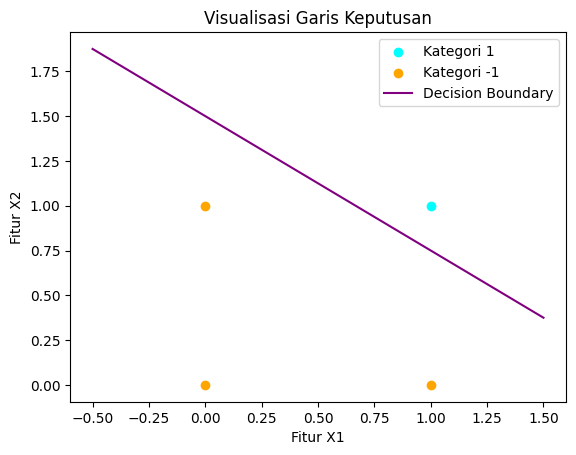

Hasil prediksi: [ 1. -1. -1. -1.]
    Input  Predicted Output  Actual Target Action
0  (1, 1)               1.0              1   None
1  (1, 0)              -1.0             -1   None
2  (0, 1)              -1.0             -1   None
3  (0, 0)              -1.0             -1   None


In [10]:
""""
ANN_1
MardananFitra_247056019
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data dan label
data = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
labels = np.array([1, -1, -1, -1])
input_with_bias = np.hstack((data, np.ones((data.shape[0], 1))))

# Inisialisasi bobot
weights = np.zeros(3)
learning_rate = 0.07

# Algoritma Perceptron
for _ in range(10):  # max_iter
    for i in range(len(input_with_bias)):
        prediction = np.sign(np.dot(weights, input_with_bias[i]))
        error = labels[i] - prediction
        weights += learning_rate * error * input_with_bias[i]

# Hasil bobot optimal
print("Bobot optimal (w1, w2, bias):", weights)

# Visualisasi
x_vals = np.linspace(-0.5, 1.5, 100)
y_vals = -(weights[0] * x_vals + weights[2]) / weights[1]
plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], color='cyan', label='Kategori 1')
plt.scatter(data[labels == -1][:, 0], data[labels == -1][:, 1], color='orange', label='Kategori -1')
plt.plot(x_vals, y_vals, color='purple', label='Decision Boundary')
plt.xlabel('Fitur X1')
plt.ylabel('Fitur X2')
plt.legend()
plt.title('Visualisasi Garis Keputusan')
plt.show()

# Prediksi output
predictions = np.sign(np.dot(input_with_bias, weights))
print("Hasil prediksi:", predictions)

# Tabel hasil prediksi
hasil_df = pd.DataFrame({
    'Input': [tuple(p) for p in data],
    'Predicted Output': predictions,
    'Actual Target': labels,
    'Action': np.where(predictions == labels, "None", "Update")
})
print(hasil_df)